# Author
Muhammad Junaid Raza 2409917

## Import Libraries

In [4]:
from datasets import load_dataset
import random
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

### Loading the dataset

In [16]:
dataset = load_dataset("emotion", split="train")

# Used increased seed size to get proper tweets data
sample = dataset.shuffle(seed=200).select(range(20))

print(sample)

Dataset({
    features: ['text', 'label'],
    num_rows: 20
})


### Saving the text of the samples to a txt file

In [18]:
file_name = 'sample_tweets.txt'
with open(file_name, 'w') as file:
    for example in sample:
        file.write(example['text'] + '\n')

print(f"File {file_name} saved")

File sample_tweets.txt saved


### Reading the annotated file and extracting text-label pairs

In [21]:
annotated_file = "annotated_texts.txt"

annotated_labels = []
with open(annotated_file, "r") as f:
    for line in f:
        label, text = line.strip().split(";", 1) 
        annotated_labels.append(int(label))

### Getting the original dataset labels

In [24]:
original_labels = sample["label"]

# Computing Cohen's Kappa
kappa_score = cohen_kappa_score(annotated_labels, original_labels)
print(f"Cohen's Kappa Score: {kappa_score:.3f}")

Cohen's Kappa Score: 0.608


### Mapping int labels to emotion string names

In [27]:
label_map = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}

original_labels_named = [label_map[label] for label in original_labels]
annotated_labels_named = [label_map[label] for label in annotated_labels]

### Visualization using Confusion Matrix

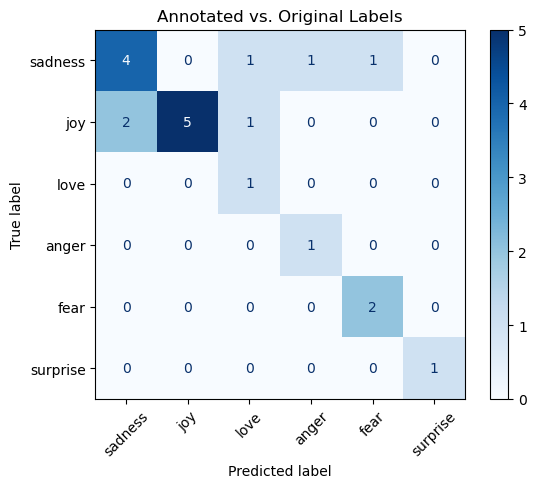

In [30]:
conf_matrix = confusion_matrix(original_labels, annotated_labels, labels=list(label_map.keys()))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(label_map.values()))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Annotated vs. Original Labels")
plt.show()